In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = machine_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = raw_data.drop(columns=['vendor_name','model_name','ERP'])
data_2 = data_processor.impute_missing_values(data_1)
data_3 = data_processor.standardize_data(data_2,data_2,features=['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'])


c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [3]:
data_3

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,-0.302859,-0.673409,-0.494275,5.680569,1.658008,4.220899,198
1,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,269
2,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,220
3,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,172
4,-0.671717,1.323114,0.358489,0.167228,0.484346,-0.087238,132
...,...,...,...,...,...,...,...
204,-0.306701,-0.481594,-0.323723,-0.620392,-0.542608,-0.394962,42
205,-0.406600,-0.481594,-0.323723,0.167228,-0.395900,-0.394962,46
206,-0.302859,-0.223779,-0.323723,-0.620392,-0.395900,-0.164169,52
207,1.061146,-0.607408,-0.323723,0.167228,-0.689316,-0.702686,67


In [4]:
data_train, data_val = cross_validator.random_partition(data_3, random_state=42)

In [5]:
data = data_train.to_numpy()
X_train = data[:,:-1]
y_train = data[:,-1:]

In [6]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-1]
y_val = data_test[:,-1:]

In [7]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=100,n_hidden_2=200,n_output=1)

MSEs, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,10000,0.000001)

Epoch 0/10000, Train MSE: 29109.371674981892, Val MSE: 67840.49282411646
Epoch 100/10000, Train MSE: 26496.35057744831, Val MSE: 63386.896185909885
Epoch 200/10000, Train MSE: 12734.82251994463, Val MSE: 41693.915924805035
Epoch 300/10000, Train MSE: 9922.856214943202, Val MSE: 35036.15755702155
Epoch 400/10000, Train MSE: 8509.69485590909, Val MSE: 31073.71249471933
Epoch 500/10000, Train MSE: 7661.005074226708, Val MSE: 28383.639832489996
Epoch 600/10000, Train MSE: 7777.723240761156, Val MSE: 27691.573928539558
Epoch 700/10000, Train MSE: 7161.851835175684, Val MSE: 26068.838537309235
Epoch 800/10000, Train MSE: 6914.238485420907, Val MSE: 25064.28131058989
Epoch 900/10000, Train MSE: 6703.244830631611, Val MSE: 24212.822845895233
Epoch 1000/10000, Train MSE: 6520.185515353986, Val MSE: 23478.94752373161
Epoch 1100/10000, Train MSE: 6358.964601870783, Val MSE: 22842.291899901848
Epoch 1200/10000, Train MSE: 6188.694966385071, Val MSE: 22279.491427567737
Epoch 1300/10000, Train MSE: 

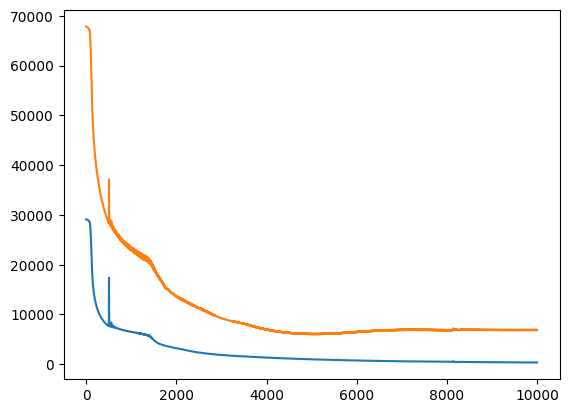

In [8]:
import matplotlib.pyplot as plt

plt.plot(MSEs)
plt.plot(val_metrics)

In [9]:
linear = LinearNetwork(config)

losses = linear.linear_regression(X_train,y_train,X_val,y_val)

Epoch 0/1000, Training MSE: 29107.59875170291, Validation MSE: 63398.09824737551
Epoch 100/1000, Training MSE: 3556.0236182908047, Validation MSE: 7197.061572195123
Epoch 200/1000, Training MSE: 3161.4298651221984, Validation MSE: 5920.6500364991325
Epoch 300/1000, Training MSE: 3126.3998435071767, Validation MSE: 5693.820298800771
Epoch 400/1000, Training MSE: 3119.7946828102413, Validation MSE: 5639.43231951588
Epoch 500/1000, Training MSE: 3118.232172177765, Validation MSE: 5626.08195732486
Epoch 600/1000, Training MSE: 3117.8258045591174, Validation MSE: 5623.764133919223
No improvement in validation MSE for 50 epochs, stopping training.
